In [1]:
#data visualixation

import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, os

In [2]:
#위도(군산시)
latitude = 35.97094510712538
#경도
longitude = 126.697727905105

m=folium.Map(location=[latitude,longitude], zoom_stat=17, width=750, height=500)
#m

In [3]:
folium.Marker([latitude, longitude], popup = '군산', tooltip='내가 사는 지역',
            icon = folium.Icon('red', icon='star'),
             ).add_to(m) #Icon(대문자 i)
#m

In [4]:
folium.CircleMarker([latitude, longitude], color='red', radius = 50 , tooltip ='전북 군산').add_to(m)
m

In [5]:
#전북 불러오기
import pandas as pd

df =  pd.read_csv('소상공인시장진흥공단_상가(상권)정보_전북_202206.csv', encoding='cp949') #쥬피터에 파일 UPload해야함
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,20763988,공덕이발관,NaN,F,생활서비스,F01,이/미용/건강,F01A04,남성미용실,S96111,...,4.521040e+24,NaN,전라북도 김제시 공덕면 공덕10길 3,576921,54320.0,NaN,NaN,NaN,126.911612,35.892901
1,23959893,MK디자인건축,NaN,D,소매,D07,가정/주방/인테리어,D07A15,유리/페인트/철물건축자재,G47519,...,4.514010e+24,NaN,전라북도 익산시 군익로 443,570080,54658.0,NaN,NaN,NaN,126.934829,35.944067
2,17174374,산리지호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4.519010e+24,남원국민호텔,전라북도 남원시 소리길 124,590090,55795.0,NaN,NaN,NaN,127.389987,35.406587


In [6]:
pd.Series(df.columns)

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
dtype: object

In [7]:
sub_df = df.loc[df['행정동명'].isin(['수송동','조촌동','삼학동'])]
#sub_df.head(3)

In [8]:
#sub_df[['위도','경도','상호명']]

In [9]:
from folium.plugins import MarkerCluster

m=folium.Map(location=[latitude, longitude], zoom_start=15)

coords = sub_df[['위도','경도']]
marker_cluster=MarkerCluster().add_to(m)

for lat,long in zip(coords['위도'],coords['경도']):
    folium.Marker([lat,long],
                 icon=folium.Icon(color="green") # Icon(대문자 i)
                  ).add_to(marker_cluster)
#m

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
gunsan = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_전북_202206.csv', encoding='cp949')
gunsan = gunsan[['시군구명','상권업종대분류명','상권업종중분류명','위도','경도']]
#gunsan

In [12]:
import requests
import json

In [13]:
# 군산 행정구역 json.raw파일(githubcontent)을 읽어서 r에 저장

r = requests.get('https://raw.githubusercontent.com/yousungkim1216/edu/main/jupyter/southkorea.json')#전국

c=r.content
#좌표 추출
gunsan_geo = json.loads(c)

In [14]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    #seoul_geo,
    gunsan_geo,
    name='지역구'
).add_to(m)

#m

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(12, 30))
#sns.countplot(y=gunsan['상권업종중분류명'], order=gunsan['상권업종중분류명'].value_counts().index)
#plt.yticks(fontsize=12)
#plt.title('군산시 업종별 개수')
#plt.show()

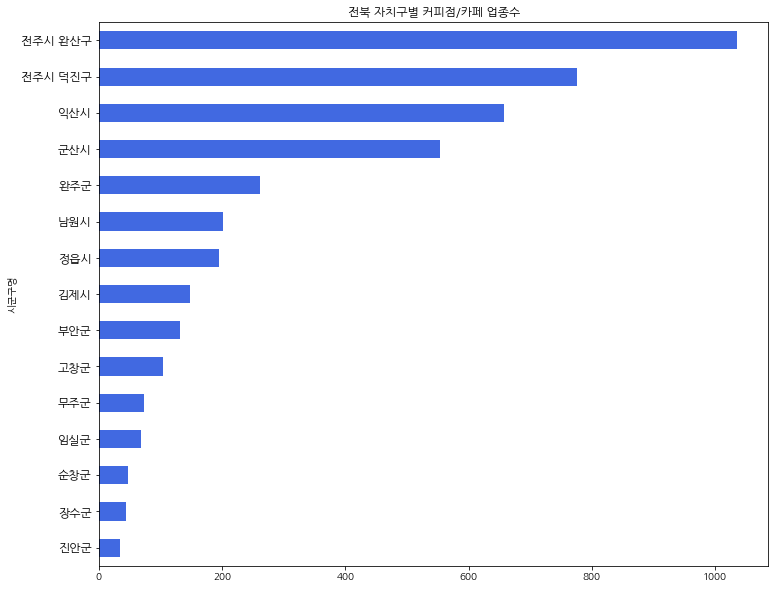

In [16]:
plt.figure(figsize=(12, 10))
gunsan.loc[gunsan['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종대분류명'].count().sort_values().plot(kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('전북 자치구별 커피점/카페 업종수')

plt.show()

In [17]:
gunsan_coffee = gunsan.loc[gunsan['상권업종중분류명'] == '커피점/카페']
#gunsan_coffee

In [18]:
gunsan_coffee = gunsan.loc[gunsan['상권업종중분류명'] == '부동산중개']
#gunsan_coffee

In [19]:

m=folium.Map(location=[35.97094510712538, 126.697727905105],zoom_start=12,tiles='cartodbpositron')
folium.GeoJson(gunsan_geo, name='지역구').add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(gunsan_coffee['위도'],gunsan_coffee['경도']):
    folium.Marker([lat,long],icon=folium.Icon(color='green')).add_to(marker_cluster)
#m

In [20]:
gunsan_group_data=gunsan.loc[gunsan['상권업종중분류명']=='커피점/카페'].groupby('시군구명')['상권업종중분류명'].count()
#gunsan_group_data

In [21]:
m=folium.Map(location=[35.97094510712538, 126.697727905105],zoom_start=12,tiles='cartodbpositron')
folium.GeoJson(gunsan_geo, name='지역구').add_to(m)

m.choropleth(geo_data=gunsan_geo, data=gunsan_group_data,
             fill_color ='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             key_on='properties.name', legend_name='군산시 커피 업종수')
#m

C:\Users\User\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [22]:
bins = list(gunsan_group_data.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(
    location=[35.97094510712538, 126.697727905105],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    gunsan_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=gunsan_geo,
             data=gunsan_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="군산시 커피 업종 수", 
             bins=bins
            )
#m
m.save('군산_임주희.html')